### Classification Notebook

In [138]:
from math import sqrt
from scipy import stats
from pydataset import data
from datetime import datetime


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from env import host, user, password
from acquire import get_titanic_data, get_iris_data, get_iris_df, get_titanic_df

##### In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [186]:
iris_df = data('iris')
iris_df.head(3)  ## Question 1: Print the first three rows

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [187]:
iris_df.shape ## Question 2: Print the number of rows and columns

(150, 5)

In [188]:
iris_df.columns ## Question 3: Print the column names

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [189]:
iris_df.info() ## Question 4: Print the data types of each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [41]:
iris_df.describe() ## Question 5: Print out the sumarry statistics of each numeric variable

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.



In [42]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1NS_AqvYEsZXF2nL3Gp2PqcwCPbEUfXTq0vGZbTNe_nI/edit#gid=1023018493'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_excel = pd.read_csv(csv_export_url) 
df_excel

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependants,start_date,average_monthly,internet_description,contract_description,phone_description,only_phone,only_internet
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,$65.60,...,True,True,3,8/15/2020,$65.60,DSL,1 Year,One Line,False,False
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,$59.90,...,True,True,0,8/15/2020,$59.90,DSL,Month-to-Month,Two or More Lines,False,False
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,$73.90,...,True,True,0,1/22/2021,$73.90,Fiber Optic,Month-to-Month,One Line,False,False
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,$98.00,...,True,True,1,4/28/2020,$98.00,Fiber Optic,Month-to-Month,One Line,False,False
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,$83.90,...,True,True,1,2/10/2021,$83.90,Fiber Optic,Month-to-Month,One Line,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,$55.15,...,True,True,0,4/3/2020,$55.15,DSL,1 Year,One Line,False,False
7039,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,$85.10,...,True,True,1,7/18/2019,$85.10,Fiber Optic,Month-to-Month,Two or More Lines,False,False
7040,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,$50.30,...,True,True,0,3/22/2021,$50.30,DSL,Month-to-Month,One Line,False,False
7041,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,$67.85,...,True,True,3,9/12/2015,$67.85,DSL,2 Year,One Line,False,False


In [43]:
df_excel_sample = df_excel.head(100)
df_excel_sample.head(5) ##Question 1: create a sample of the first 100 rows

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependants,start_date,average_monthly,internet_description,contract_description,phone_description,only_phone,only_internet
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,$65.60,...,True,True,3,8/15/2020,$65.60,DSL,1 Year,One Line,False,False
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,$59.90,...,True,True,0,8/15/2020,$59.90,DSL,Month-to-Month,Two or More Lines,False,False
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,$73.90,...,True,True,0,1/22/2021,$73.90,Fiber Optic,Month-to-Month,One Line,False,False
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,$98.00,...,True,True,1,4/28/2020,$98.00,Fiber Optic,Month-to-Month,One Line,False,False
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,$83.90,...,True,True,1,2/10/2021,$83.90,Fiber Optic,Month-to-Month,One Line,False,False


In [44]:
df_excel_sample.shape

(100, 26)

In [45]:
df_excel.shape ## Question 2: Print the number of rows of your original dataframe

(7043, 26)

In [46]:
df_excel.columns[0:5] ## Question 3: Print the first five column names

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [47]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7043 non-null   object 
 1   gender                  7043 non-null   object 
 2   is_senior_citizen       7043 non-null   int64  
 3   partner                 7043 non-null   object 
 4   dependents              7043 non-null   object 
 5   phone_service           7043 non-null   int64  
 6   internet_service        7043 non-null   int64  
 7   contract_type           7043 non-null   int64  
 8   payment_type            7043 non-null   object 
 9   monthly_charges         7043 non-null   object 
 10  total_charges           7032 non-null   object 
 11  churn                   7043 non-null   object 
 12  monthly tenure          7043 non-null   float64
 13  is_female               7043 non-null   bool   
 14  has_churned             7043 non-null   

In [48]:
df_excel.select_dtypes(include = object).columns ## Question 4: Print out the columns that 
## have object as their data type

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'monthly_charges', 'total_charges', 'churn', 'start_date',
       'average_monthly', 'internet_description', 'contract_description',
       'phone_description'],
      dtype='object')

In [49]:
df_excel.total_charges = df_excel.total_charges.astype(str)
df_excel.monthly_charges = df_excel.monthly_charges.astype(str)

In [50]:
df_excel.total_charges = df_excel.total_charges.str.replace('$','')
df_excel.total_charges = df_excel.total_charges.str.replace(',','').astype(float)
df_excel.monthly_charges = df_excel.monthly_charges.str.replace('$','')
df_excel.monthly_charges = df_excel.monthly_charges.str.replace(',','').astype(float)
df_excel.select_dtypes(include = float).columns ## Cleaning charges columns into floats

Index(['monthly_charges', 'total_charges', 'monthly tenure'], dtype='object')

In [51]:
total_charges_range = df_excel.total_charges.max() - df_excel.total_charges.min()
monthly_charges_range = df_excel.monthly_charges.max() - df_excel.monthly_charges.min()
total_charges_range, monthly_charges_range 

## Question 5: display the ranges for the 2 numerical columns

(8666.0, 100.5)

##### Read the data from this google sheet into a dataframe, df_google



In [52]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

In [53]:
df_google.head(3) ## Question 1: Print the first three rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [54]:
df_google.shape ## Question 2: Print the number of rows and columns

(891, 12)

In [55]:
df_google.columns ## Question 3: Print the column names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [56]:
df_google.info() ## Question 4: Print the datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
df_google.describe() ## Question 4: Print the summary statistics for each numeric 
## variable

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
## Printing out the unique values for each categorical variable below


In [59]:
df_google.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [60]:
df_google.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [61]:
df_google.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [62]:
df_google.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [63]:
df_google.select_dtypes(include='O').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

#### Prepare Data Exercises

##### Use the function defined in acquire.py to load the iris data.



In [64]:
iris = get_iris_data()
iris.head(3)

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2


##### Drop the species_id and measurement_id columns.



In [65]:
## iris = iris.drop(columns='species_id') already dropped the column can't run again
iris.head(3)


,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2


##### Rename the species_name column to just species.



In [66]:
iris = iris.rename(columns={'species_name': 'species'})
iris.head(3)

,species_id,species,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2


##### Create dummy variables of the species name.



In [67]:
species_dummies = pd.get_dummies(iris.species)
species_dummies.head(3)

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0


In [68]:
species_dummies = pd.get_dummies(iris.species, drop_first=True)
species_dummies.head(3)

,versicolor,virginica
0,0,0
1,0,0
2,0,0


In [69]:
iris = pd.concat([iris, species_dummies], axis=1)
iris.head()

,species_id,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,1,setosa,5.1,3.5,1.4,0.2,0,0
1,1,setosa,4.9,3.0,1.4,0.2,0,0
2,1,setosa,4.7,3.2,1.3,0.2,0,0
3,1,setosa,4.6,3.1,1.5,0.2,0,0
4,1,setosa,5.0,3.6,1.4,0.2,0,0


##### Create a function named prep_iris that accepts the untransformed iris data and returns the data with the transformations above applied.¶


In [70]:
def prep_iris():
    '''
    This function loads the untransformed iris data and returns the data with dropped
    redundant columns and dummy variables (preparing the data)
    '''
    df = get_iris_data()
    df = df.drop(columns='species_id').rename(columns={'species_name': 'species'})
    species_dummies = pd.get_dummies(df.species, drop_first=True)
    df = pd.concat([df, species_dummies], axis=1)
    
    return df

In [71]:
iris = prep_iris()
iris.sample(5)

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
114,virginica,5.8,2.8,5.1,2.4,0,1
67,versicolor,5.8,2.7,4.1,1.0,1,0
76,versicolor,6.8,2.8,4.8,1.4,1,0
89,versicolor,5.5,2.5,4.0,1.3,1,0
77,versicolor,6.7,3.0,5.0,1.7,1,0


## Tidy Data Exercises

#### Do your work for this exercise in a jupyter notebook or python script named tidy_data. Save this work in your classification-exercises repo. Then add, commit, and push your changes.

###### Question 1: Attendance Data

Load the attendance.csv file and calculate an attendnace percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.



In [72]:
attendance_df = pd.read_csv('untidy-data/attendance.csv')
attendance_df.head()

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [73]:
attendance_melted = attendance_df.melt(id_vars = 'Unnamed: 0', var_name = 'Day', value_name = 'Attendance')
attendance_melted = attendance_melted.rename(columns = {'Unnamed: 0': 'Student'})
attendance_melted

,Student,Day,Attendance
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T
5,Jane,2018-01-02,P
6,Billy,2018-01-02,T
7,John,2018-01-02,T
8,Sally,2018-01-03,T
9,Jane,2018-01-03,T


In [99]:
attendance_melted['Attendance'] = attendance_melted['Attendance'].replace({'T': 0.9, 'P': 1, 'A': 0.0, 'H': 0.5})
## Can't run code above twice so I commented it out
### attendance_melted = attendance_melted.drop(columns = 'attendance')
attendance_melted

,Student,Day,Attendance
0,Sally,2018-01-01,1.0
1,Jane,2018-01-01,0.0
2,Billy,2018-01-01,0.0
3,John,2018-01-01,1.0
4,Sally,2018-01-02,0.9
5,Jane,2018-01-02,1.0
6,Billy,2018-01-02,0.9
7,John,2018-01-02,0.9
8,Sally,2018-01-03,0.9
9,Jane,2018-01-03,0.9


In [100]:
attendance_melted.groupby(by=['Student']).mean()

,Attendance
Student,
Billy,0.5250
Jane,0.6875
John,0.9125
Sally,0.7625


#### Question 2: Coffee Levels

#### Read the coffee_levels.csv file.

In [102]:
coffee_df = pd.read_csv('untidy-data/coffee_levels.csv')
coffee_df.head()

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291


#### Transform the data so that each carafe is in it's own column.


In [103]:
coffee_df.coffee_carafe.value_counts()

z    10
y    10
x    10
Name: coffee_carafe, dtype: int64

In [104]:
coffee_df.pivot(index = 'hour', columns = 'coffee_carafe')

coffee_amount                    
coffee_carafe             x         y         z
hour                                           
8                  0.816164  0.189297  0.999264
9                  0.451018  0.521502  0.915990
10                 0.843279  0.023163  0.144928
11                 0.335533  0.235529  0.311495
12                 0.898291  0.017009  0.771947
13                 0.310711  0.997464  0.398520
14                 0.507288  0.058361  0.864464
15                 0.215043  0.144644  0.436364
16                 0.183891  0.544676  0.280621
17                 0.391560  0.594126  0.436677

##### Is this the best shape for the data?


I believe this would be the best shape visually. We have easy to read columns for the readers. However, most likely not the best shape for a model/computer to read.

#### Question 3: Cake Recipes

#### Read the cake_recipes.csv data. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.

Step One: Tidy the data as neccessary to perform the questions neccessary to complete the exercise

In [75]:
cake_df = pd.read_csv('untidy-data/cake_recipes.csv')
cake_df.head()

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084


In [76]:
cake_df['recipe:position'].str.split(':', expand = True)

,0,1
0,a,bottom
1,a,top
2,b,bottom
3,b,top
4,c,bottom
5,c,top
6,d,bottom
7,d,top


In [77]:
cake_df[['recipe', 'position']] = cake_df['recipe:position'].str.split(':', expand = True)
cake_df.head()

,recipe:position,225,250,275,300,recipe,position
0,a:bottom,61.738655,53.912627,74.414730,98.786784,a,bottom
1,a:top,51.709751,52.009735,68.576858,50.228470,a,top
2,b:bottom,57.095320,61.904369,61.196980,99.248541,b,bottom
3,b:top,82.455004,95.224151,98.594881,58.169349,b,top
4,c:bottom,96.470207,52.001358,92.893227,65.473084,c,bottom


In [78]:
cake_df = cake_df.drop(columns = 'recipe:position')
cake_df.head()

,225,250,275,300,recipe,position
0,61.738655,53.912627,74.414730,98.786784,a,bottom
1,51.709751,52.009735,68.576858,50.228470,a,top
2,57.095320,61.904369,61.196980,99.248541,b,bottom
3,82.455004,95.224151,98.594881,58.169349,b,top
4,96.470207,52.001358,92.893227,65.473084,c,bottom


In [79]:
melted_cake = cake_df.melt(id_vars = ['recipe', 'position'], 
                           var_name = 'Temperature', 
                           value_name = 'Taste_Score')
melted_cake

,recipe,position,Temperature,Taste_Score
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,b,bottom,225,57.095320
3,b,top,225,82.455004
4,c,bottom,225,96.470207
5,c,top,225,71.306308
6,d,bottom,225,52.799753
7,d,top,225,96.873178
8,a,bottom,250,53.912627
9,a,top,250,52.009735


#### Which recipe, on average, is the best?


In [80]:
melted_cake.groupby(by=['recipe']).mean()

## recipe b seems to perform the best in the taste_score category

,Taste_Score
recipe,
a,63.922201
b,76.736074
c,75.874748
d,62.864844


#### Which oven temperature, on average, produces the best results?

In [81]:
melted_cake.groupby(by=['Temperature']).mean()

### 275 degree oven temperature produces the best results according to the Taste_Score column

,Taste_Score
Temperature,
225,71.306022
250,66.577437
275,74.886754
300,66.627655


#### Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees


In [82]:
melted_cake.head()

,recipe,position,Temperature,Taste_Score
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,b,bottom,225,57.095320
3,b,top,225,82.455004
4,c,bottom,225,96.470207


In [83]:
stacked_df = melted_cake.groupby(by=['recipe', 'position', 'Temperature']).mean()
stacked_df


Taste_Score
recipe position Temperature             
a      bottom   225            61.738655
                250            53.912627
                275            74.414730
                300            98.786784
       top      225            51.709751
                250            52.009735
                275            68.576858
                300            50.228470
b      bottom   225            57.095320
                250            61.904369
                275            61.196980
                300            99.248541
       top      225            82.455004
                250            95.224151
                275            98.594881
                300            58.169349
c      bottom   225            96.470207
                250            52.001358
                275            92.893227
                300            65.473084
       top      225            71.306308
                250            82.795477
                275            92.098049
                300            53.960273
d      bottom   225            52.799753
                250            58.670419
                275            51.747686
                300            56.183110
       top      225            96.873178
                250            76.101363
                275            59.571620
                300            50.971626

In [84]:
melted_cake.groupby(by=['recipe', 'position', 'Temperature']).mean().max()

Taste_Score    99.248541
dtype: float64

In [85]:
winner = stacked_df['Taste_Score'].idxmax()
winner

## The best performing overall combination for baking is recipe b, oven rack position on the bottom
## and 300 degrees for the temperature

('b', 'bottom', '300')

In [86]:
melted_cake.nlargest(1, ['Taste_Score'])

,recipe,position,Temperature,Taste_Score
26,b,bottom,300,99.248541


### Exploratory Analysis Exercises

##### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

##### Acquire, prepare & split your data.



In [87]:
iris_df = get_iris_data()
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [88]:
iris_df = iris_df.drop(columns = 'species_id')
iris_df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [89]:
iris_df.info(), iris_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_name  150 non-null    object 
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


(None, (150, 5))

In [90]:
train, test = train_test_split(iris_df, test_size=0.2, 
                               random_state=1349, 
                               stratify=iris_df.species_name)
train, validate = train_test_split(train, train_size=0.7, 
                                   random_state=1349, 
                                   stratify=train.species_name)

In [91]:
train.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
138,virginica,6.0,3.0,4.8,1.8
7,setosa,5.0,3.4,1.5,0.2
79,versicolor,5.7,2.6,3.5,1.0
74,versicolor,6.4,2.9,4.3,1.3
97,versicolor,6.2,2.9,4.3,1.3


In [92]:
train.shape

(84, 5)

In [93]:
test.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
24,setosa,4.8,3.4,1.9,0.2
117,virginica,7.7,3.8,6.7,2.2
17,setosa,5.1,3.5,1.4,0.3
31,setosa,5.4,3.4,1.5,0.4
114,virginica,5.8,2.8,5.1,2.4


In [94]:
test.shape

(30, 5)

In [95]:
validate.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
5,setosa,5.4,3.9,1.7,0.4
28,setosa,5.2,3.4,1.4,0.2
33,setosa,5.5,4.2,1.4,0.2
46,setosa,5.1,3.8,1.6,0.2
113,virginica,5.7,2.5,5.0,2.0


In [96]:
validate.shape

(36, 5)

##### For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [121]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,84.0,5.847619,0.841324,4.3,5.075,5.9,6.425,7.7
sepal_width,84.0,3.053571,0.417233,2.0,2.800,3.0,3.300,4.4
petal_length,84.0,3.738095,1.765459,1.0,1.600,4.3,5.100,6.9
petal_width,84.0,1.208333,0.775717,0.1,0.375,1.3,1.800,2.5


<AxesSubplot:>

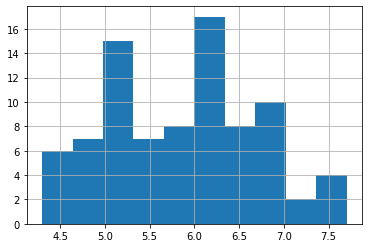

In [105]:
train.sepal_length.hist()

<AxesSubplot:xlabel='sepal_length'>

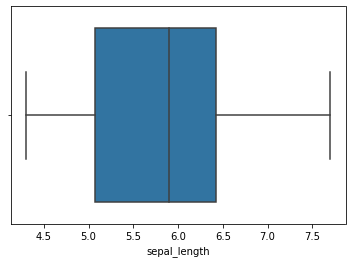

In [190]:
sns.boxplot(data = train, x = 'sepal_length')

<AxesSubplot:>

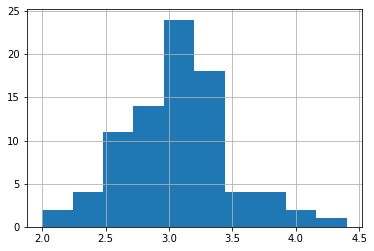

In [106]:
train.sepal_width.hist()

<AxesSubplot:xlabel='sepal_width'>

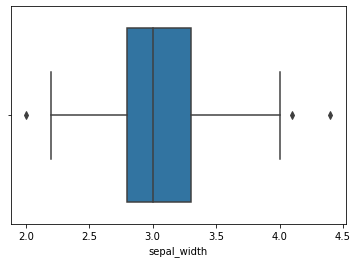

In [191]:
sns.boxplot(data = train, x = 'sepal_width')

<AxesSubplot:>

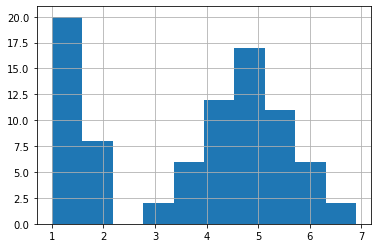

In [111]:
train.petal_length.hist() 

<AxesSubplot:xlabel='petal_length'>

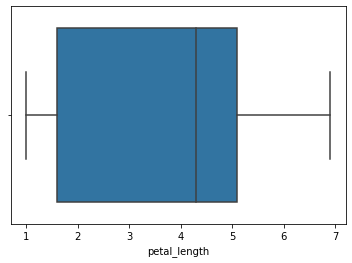

In [192]:
sns.boxplot(data = train, x = 'petal_length')

<AxesSubplot:>

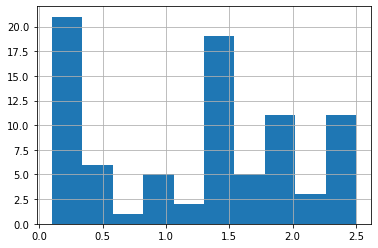

In [108]:
train.petal_width.hist()

<AxesSubplot:xlabel='petal_width'>

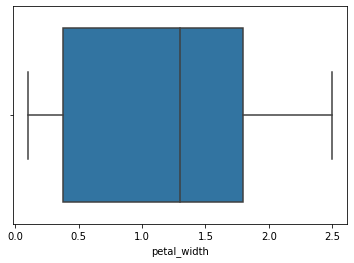

In [193]:
sns.boxplot(data = train, x = 'petal_width')

##### For each species (categorical variable): create a frequency table and a bar plot of those frequencies.



In [124]:
train.species_name.value_counts()

setosa        28
virginica     28
versicolor    28
Name: species_name, dtype: int64

<AxesSubplot:xlabel='species_name', ylabel='count'>

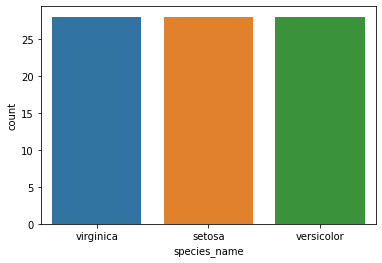

In [140]:
sns.countplot(x = 'species_name', data = train)

##### Document takeaways & any actions.




The train data set splits the data into equal frequencies for the categorical variabale since we only have 1 (species_name). Looking at the box plots we can see that sepal width has a few outliers. Meaning it will most likely not be the best identifier for model building purposes. Building a predictive model to predict the flower species based on one of the quantitative variables would be best done using one of the discrete variables that has no outliers (petal_length, petal_width)

#### Bivariate Stats

##### Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

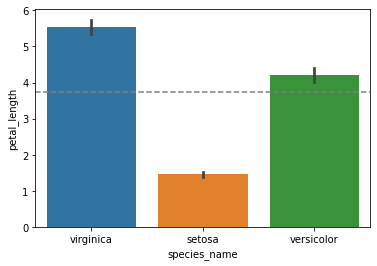

In [149]:
pl_mean = train.petal_length.mean()
p_length = sns.barplot(x = 'species_name', data = train, y = 'petal_length')
p_length.axhline(pl_mean, ls='--', color='grey')

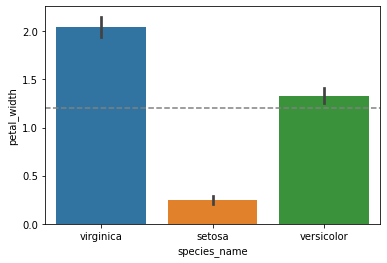

In [150]:
pw_mean = train.petal_width.mean()
p_width = sns.barplot(x = 'species_name', data = train, y = 'petal_width')
p_width.axhline(pw_mean, ls='--', color='grey')

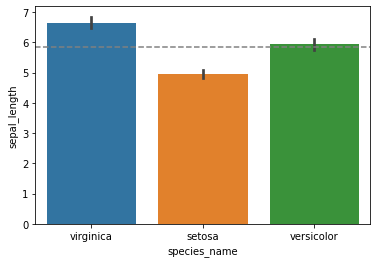

In [146]:
sepal_mean = train.sepal_length.mean()
s_length = sns.barplot(x = 'species_name', data = train, y = 'sepal_length')
s_length.axhline(sepal_mean, ls='--', color='grey')

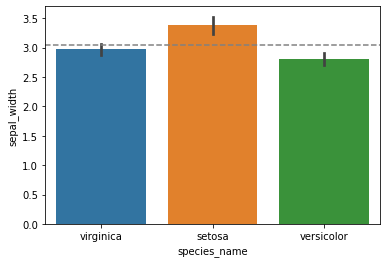

In [151]:
sw_mean = train.sepal_width.mean()
s_width = sns.barplot(x = 'species_name', data = train, y = 'sepal_width')
s_width.axhline(sw_mean, ls='--', color='grey')

##### For each measurement type, compute the descriptive statistics for each species.

In [136]:
train.groupby(by=['species_name']).describe().T

species_name           setosa  versicolor  virginica
sepal_length count  28.000000   28.000000  28.000000
             mean    4.957143    5.935714   6.650000
             std     0.362531    0.512231   0.532986
             min     4.300000    5.000000   5.800000
             25%     4.775000    5.600000   6.300000
             50%     5.000000    6.000000   6.600000
             75%     5.100000    6.300000   6.900000
             max     5.800000    6.900000   7.700000
sepal_width  count  28.000000   28.000000  28.000000
             mean    3.385714    2.800000   2.975000
             std     0.433516    0.303071   0.260519
             min     2.300000    2.000000   2.200000
             25%     3.100000    2.700000   2.800000
             50%     3.350000    2.900000   3.000000
             75%     3.625000    3.000000   3.200000
             max     4.400000    3.400000   3.400000
petal_length count  28.000000   28.000000  28.000000
             mean    1.457143    4.217857   5.539286
             std     0.185450    0.522142   0.525173
             min     1.000000    3.000000   4.800000
             25%     1.400000    3.900000   5.100000
             50%     1.500000    4.300000   5.550000
             75%     1.600000    4.600000   5.825000
             max     1.900000    5.100000   6.900000
petal_width  count  28.000000   28.000000  28.000000
             mean    0.246429    1.332143   2.046429
             std     0.129048    0.205577   0.294998
             min     0.100000    1.000000   1.500000
             25%     0.200000    1.275000   1.800000
             50%     0.200000    1.300000   2.050000
             75%     0.325000    1.500000   2.300000
             max     0.600000    1.700000   2.500000

##### For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.



In [167]:
no_setosa = train[train.species_name != 'setosa']  ###I did an extra table here... 
### forgive me please
no_setosa.head(3)

,species_name,sepal_length,sepal_width,petal_length,petal_width
138,virginica,6.0,3.0,4.8,1.8
79,versicolor,5.7,2.6,3.5,1.0
74,versicolor,6.4,2.9,4.3,1.3


virginica_df = no_setosa[no_setosa.species_name == 'virginica']
virginica_df.head(3)

In [158]:
versicolor_df = no_setosa[no_setosa.species_name == 'versicolor']
versicolor_df.head(3)

,species_name,sepal_length,sepal_width,petal_length,petal_width
79,versicolor,5.7,2.6,3.5,1.0
74,versicolor,6.4,2.9,4.3,1.3
97,versicolor,6.2,2.9,4.3,1.3


In [163]:
U, p = stats.mannwhitneyu(virginica_df.sepal_length, versicolor_df.sepal_length)
U, p

(132.0, 1.0119920315840642e-05)

There is clearly a significant difference in the sepal length from the two different species (versicolor and virginica)

In [164]:
U, p = stats.mannwhitneyu(virginica_df.sepal_width, versicolor_df.sepal_width)
U, p

(250.0, 0.009508012794926874)

There is clearly a significant difference in the sepal length from the two different species (versicolor and virginica)

In [165]:
U, p = stats.mannwhitneyu(virginica_df.petal_length, versicolor_df.petal_length)
U, p

(12.5, 2.5253450566492905e-10)

There is clearly a significant difference in the sepal length from the two different species (versicolor and virginica)

In [166]:
U, p = stats.mannwhitneyu(virginica_df.petal_width, versicolor_df.petal_width)
U, p

(15.5, 2.982389808696449e-10)

There is clearly a significant difference in the sepal length from the two different species (versicolor and virginica)

#### Document takeaways & any actions.



Looking at the mannwhitney u statistics test we can see the columns that have the lowest p value are the test comparing the virginica and versicolor petals. Therefore these options petal__length and petal_width would be the best variables to build an accurate prediction model for species of the flower in this dataset.

Furthermore comparing the bar plots as well. The petal width has the most variance in regards to the mean. Meaning it would be the best option in building a predictive model because is has a p-value that nearly approaches 0 between versicolor and virginica flowers, and the petal width bar plot shows more variance than the petal_length barplot.

#### Multivariate Stats

##### Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

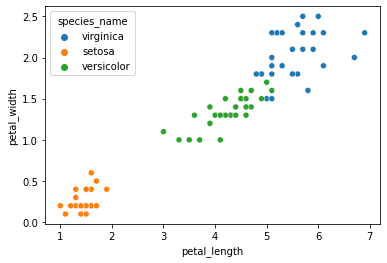

In [169]:
sns.scatterplot(data = train, x = 'petal_length', 
                y = 'petal_width', hue = 'species_name')

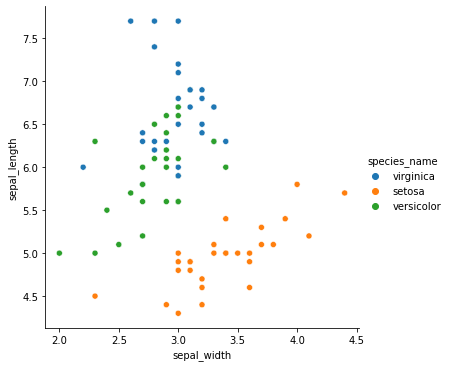

In [170]:
sns.relplot(data = train, x = 'sepal_width', y = 'sepal_length',
            hue = 'species_name' 
           )

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

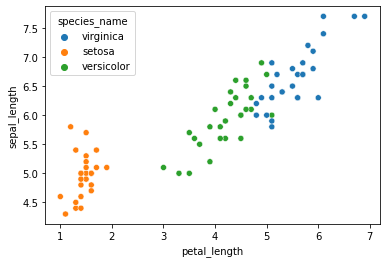

In [171]:
sns.scatterplot(data = train, x = 'petal_length', 
                y = 'sepal_length', hue = 'species_name')

<AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>

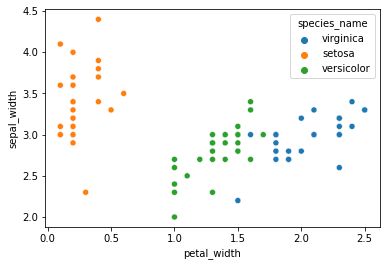

In [172]:
sns.scatterplot(data = train, x = 'petal_width', 
                y = 'sepal_width', hue = 'species_name')

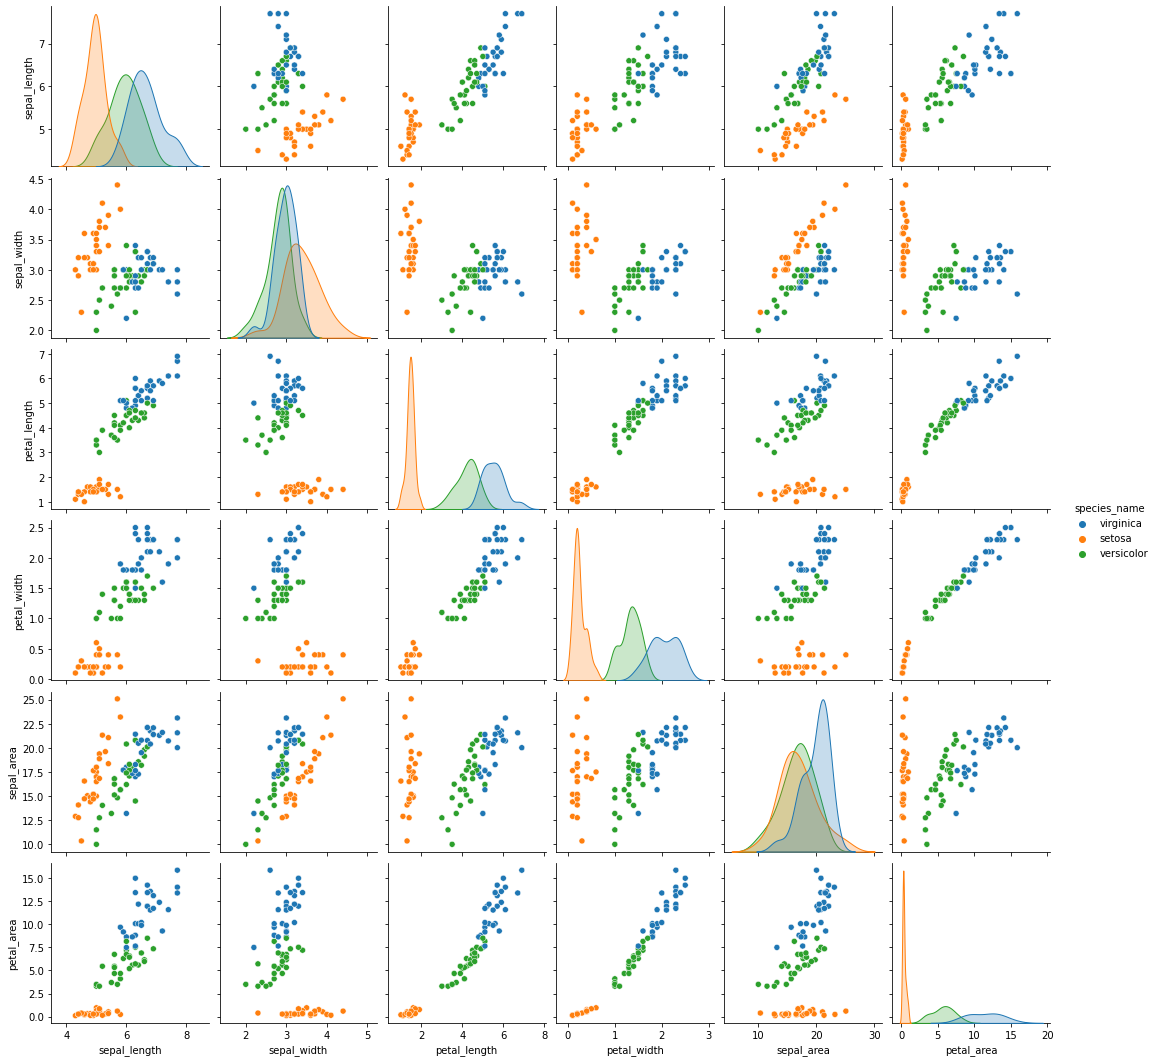

In [194]:
sns.pairplot(train, hue='species_name')
plt.show()

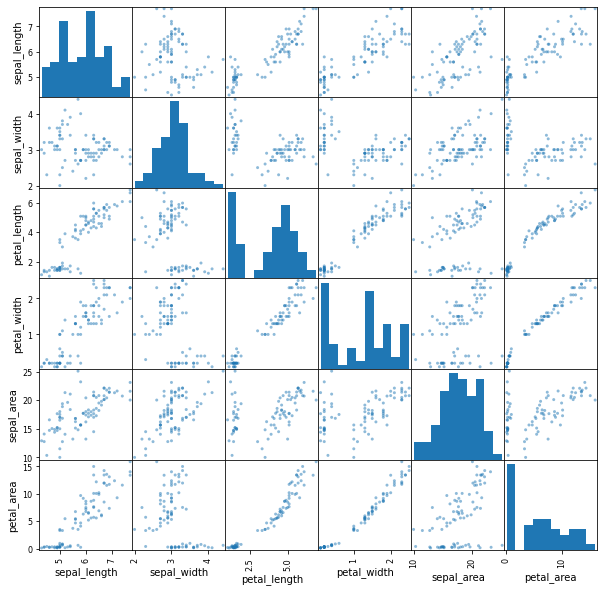

In [198]:
pd.plotting.scatter_matrix(train, figsize =(10,10))
plt.show()

#### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.



In [176]:
melt = train.melt(id_vars='species_name', var_name='measurement')
melt.head()

,species_name,measurement,value
0,virginica,sepal_length,6.0
1,setosa,sepal_length,5.0
2,versicolor,sepal_length,5.7
3,versicolor,sepal_length,6.4
4,versicolor,sepal_length,6.2


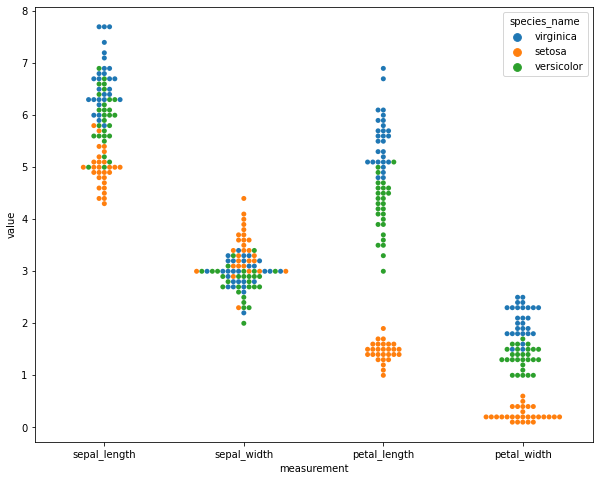

In [177]:
plt.figure(figsize=(10,8))
p = sns.swarmplot(
x='measurement',
y='value',
hue='species_name',
data=melt)


Looking at the swarmplots of the different measurements. We can see that sepal lenth and sepal width have least amount of variance among the species. Meaning they would not want to be used to build an accurate model. Looking at the petal length and petal_width swarmplots we can see the species are closely clustered having the most variance. This means when building an accurate classification model we would most likely choose either one of these two variables to make the most accurate model.

#### Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).



In [178]:
train.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
138,virginica,6.0,3.0,4.8,1.8
7,setosa,5.0,3.4,1.5,0.2
79,versicolor,5.7,2.6,3.5,1.0
74,versicolor,6.4,2.9,4.3,1.3
97,versicolor,6.2,2.9,4.3,1.3


In [179]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width
train.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
138,virginica,6.0,3.0,4.8,1.8,18.00,8.64
7,setosa,5.0,3.4,1.5,0.2,17.00,0.30
79,versicolor,5.7,2.6,3.5,1.0,14.82,3.50
74,versicolor,6.4,2.9,4.3,1.3,18.56,5.59
97,versicolor,6.2,2.9,4.3,1.3,17.98,5.59


In [181]:
vg_df = train[train.species_name == 'virginica']
vg_df.head(3)

,species_name,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
138,virginica,6.0,3.0,4.8,1.8,18.00,8.64
103,virginica,6.3,2.9,5.6,1.8,18.27,10.08
135,virginica,7.7,3.0,6.1,2.3,23.10,14.03


In [182]:
vc_df = train[train.species_name == 'versicolor']
vc_df.head(3)

,species_name,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
79,versicolor,5.7,2.6,3.5,1.0,14.82,3.50
74,versicolor,6.4,2.9,4.3,1.3,18.56,5.59
97,versicolor,6.2,2.9,4.3,1.3,17.98,5.59


In [185]:
vc_df.sepal_area.mean(), vg_df.sepal_area.mean()

(16.707500000000003, 19.790357142857147)

$H_0$: There is no significant difference between the sepal area versus the categorical variables: versicolor and virginica

$H_a$: The sepal area for virginica is significantly greater than the speal area for versicolor

In [183]:
U, p = stats.mannwhitneyu(vg_df.sepal_area, vc_df.sepal_area)
U, p

(147.5, 3.178649460556366e-05)

Given the p value is nearly approaching 0 and is less than 0.05 we reject the null hypothesis, and state that the sepal area for virginica is significantly greater than the sepal area for versicolor

#### Document takeaways and any actions.

I didn't even thing to look at the area
A big takeaway from this last part is too think outside the box of your data. There may be columns that can be added or multiplied together to make new columns that could possibly be better for building a model.

